## 
<center><h1 style="text-decoration: underline;">Indian Start-up Funding Analysis</h1></center>


### **Project Scenario**

The Team is trying to venture into the Indian start-up ecosystem. As the data expert of the team, I was tasked to:

- Investigate the ecosystem and propose the best course of action.
  - Analyze funding received by start-ups in India from 2018 to 2021.
  - Separate data for each year of funding will be provided.
  - Find the start-ups’ details, the funding amounts received, and the investors' information.

### **Business Understanding**
The Indian startup ecosystem has experienced significant growth and investment over the past few years. As a data expert tasked with investigating this ecosystem, our goal is to analyze the funding received by startups in India from 2018 to 2021 and provide insights to guide investment decisions. By examining the details of startups, funding amounts, and investor information, we aim to understand the trends, opportunities, and challenges within the Indian startup landscape.

### **Objective**

To analyze funding trends and dynamics within the Indian start-up ecosystem from 2018 to 2021 and propose strategic recommendations for the team's venture.

### **Hypothesis Testing**
***Null Hypothesis(Ho)***: There is no siginificate difference in the amount of funding between startups in Bangalore.

***Alternative Hypothesis(Ha)***: There is a siginificate difference in the amount of funding between startups in Banaglore.

### **Business Questions**
####
1.What sectors have shown the highest growth in terms of funding received over the past four years?

2.What locations within India have emerged as the primary hubs for startup activity and investment, and what factors contribute to their prominence?

3.Are there any notable differences in funding patterns between early-stage startups and more established companies?

4.Which sectors recieve the lowest level of funding and which sectors recieve the highest levels of funding in India.

5.Which investors have more impact on startups over the years?

6.What are the key characteristics of startups that successfully secure funding, and how do they differ from those that struggle to attract investment?

## ***Import necessary libraries***

In [20]:
from dotenv import dotenv_values 
import pyodbc 
import numpy as np
import pandas as pd                      
import re     
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import statistics as stat 
import geopandas as gpd
#import geoplot as gplt
import folium
from folium.plugins import MarkerCluster
from scipy.stats import mannwhitneyu
#from geopy.geocoders import Nominatim    
from scipy.stats import ttest_ind    
import warnings
warnings.filterwarnings('ignore')

print("🛬 Imported all packages.", "Warnings hidden. 👻")

🛬 Imported all packages. Warnings hidden. 👻


In [21]:
%pip install --quiet geoplot geopy

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'geoplot\xa0geopy'


#### <center><h1 style="text-decoration: underline;">**LOAD DATA**</h1></center>



In [22]:
df2018 = pd.read_csv('Dataset/data_2018.csv')
df2019 = pd.read_csv('Dataset/data_2019.csv')


##### *For 2020 and 2021 datasets, were from a database management system, that is MIRCORSOFT SQL SERVER. Connection was made to the database using an Open Database Connectivity standard library, pyodbc. <br>*



In [23]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [24]:
# Create a connection string
connection_string = f"Driver={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [25]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary
connection = pyodbc.connect(connection_string)

In [26]:
# Now the sql query to get the data is what what you see below.
# Note that you will not have permissions to insert delete or update this database table.
query1 = "Select * from dbo.LP1_startup_funding2020"
df2020 = pd.read_sql(query1, connection)

query2 = "Select * from dbo.LP1_startup_funding2021"
df2021 = pd.read_sql(query2, connection)


#### <center><h1 style="text-decoration: underline;">**EXLORATORY DATA ANALYSIS(*EDA*)**</h1></center>


##### 1. Drop column10 in tdf2020 since it has just two values that are not null and are also just repetition of values in Stage column 

In [27]:
df2020.drop('column10', axis=1, inplace=True) if 'column10' in df2020.columns else df2020
df2020.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed


#### 2. Clean column names; 

In [28]:
# Function to clean the column names

def stripper(string: str, strip: list) -> str:
    """Strips a strip list from a given string and returns the string"""
    for s in strip:
        string = string.replace(s, '')
        
    return string
    
def replacer(string: str, replace: list) -> str:
    """Replaces each character in replace list with underscore given a string and returns the string"""
    for r in replace:
        string = string.replace(r, '_')
                
    return string
    
def clean_column_names(df):
    strip   = ['(', ')', '$']
    replace = [' ', '/'] 
    df.columns = [replacer(stripper(col_name.lower(), strip), replace) for col_name in df.columns]
    return df


In [29]:
# Clean the column names
df2018 = clean_column_names(df2018)
df2019 = clean_column_names(df2019)
df2020 = clean_column_names(df2020)
df2021 = clean_column_names(df2021)

#### 3. Create "year" column to identify each dataset by the year collected

In [30]:
df2018['year'] = 2018
df2019['year'] = 2019
df2020['year'] = 2020
df2021['year'] = 2021


#### ***The 2018 dataset columns are named differently from other datasets. Rename***

In [31]:
# Rename round_series to stage and location to headquarter
df2018.rename(columns={
    'company_name': 'company_brand', 
    'industry': 'sector', 
    'round_series': 'stage', 
    'about_company': 'what_it_does', 
    'location': 'headquarter'
    },
    inplace=True
)

df2018.head()

,company_brand,sector,stage,amount,headquarter,what_it_does,year
0,PetSutra,Veterinary,Seed,"₹9,500,000","Gurgaon, Haryana, India",Gurugram-based Online petcare platform.,2018
1,Chaayos,"Food and Beverage, Restaurants, Tea",Series B,"₹810,000,000","New Delhi, Delhi, India",Chaayos was born in November 2012 out of this ...,2018
2,Origo,—,Venture - Series Unknown,"₹800,000,000","Gurgaon, Haryana, India","Origo Commodities, a complete post-harvest man...",2018
3,Vogo Rentals,"Last Mile Transportation, Railroad, Transporta...",Debt Financing,"₹80,000,000","Kormangala, Karnataka, India",Vogo is a dockless scooter rental company in I...,2018
4,Myra,"Apps, Health Care, Pharmaceutical",Venture - Series Unknown,"₹8,750,000","Bangalore, Karnataka, India",Myra is a unique solution of technology and op...,2018


#### 4. Concatenate all the datasets into one.


In [32]:
final_dataset = pd.concat([df2020, df2018, df2019, df2021], ignore_index=True)

final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   headquarter    2765 non-null   object 
 3   sector         2861 non-null   object 
 4   what_it_does   2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2253 non-null   object 
 7   amount         2622 non-null   object 
 8   stage          1941 non-null   object 
 9   year           2879 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 225.1+ KB


#### 5. Clean Columns

- Headquarter & Sector column
    - If column value contains '#REF!', clean it and shift the row starting from that column by 1 step and until the stage column
    - Sanitize sector column if after cleaning and shifting, but the sector value is also present among unique values of the headquarter column
    - Fixes index 1297, 1312, 2155

- Replace 'None' string values with NaN element-wise allowing for consistent representation of missing values

In [33]:
# Function to remove '#REF!' in a series
def remove_ref(value):
    if isinstance(value, str):
        value = value.replace('#REF!', '').strip()
            
    return value

# Columns of Interest 
columns = ['headquarter', 'investor']
for column in columns:    
    # Identify rows where column value contains '#REF!
    mask = final_dataset[column].str.contains('#REF!')
    
    # Fill missing values in mask with False
    mask.fillna(False, inplace=True)
    
    # Update the column by applying the remove_ref function to the column
    final_dataset.loc[mask, column] = final_dataset.loc[mask, column].apply(remove_ref)
    
    # Shift values in selected rows excluding the last column 'year'
    final_dataset.loc[mask, column:'stage'] = final_dataset.loc[mask, column:'stage'].shift(1, axis=1)


# Sanitisizing the sector column after shifting
mask = final_dataset['sector'].apply(lambda x: x in final_dataset['headquarter'].unique())

# Update 'headquarter' value with 'sector' value
final_dataset.loc[mask, 'headquarter'] = final_dataset.loc[mask, 'sector']

# Set the 'sector' value to NaN
final_dataset.loc[mask, 'sector'] = np.nan          

In [34]:
# Function replace None with NaN
def replace_none(value):
    if isinstance(value, str) and (value.lower() == 'none' or value.lower() == 'nan'):
        value = np.nan
    
    return value

# Apply the function to all columns
final_dataset = final_dataset.applymap(replace_none) # element-wise



### **a) Amount Column**

#### Convert rupees to dollars with the respective yearly exchange rates

[Source: OFX](https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/)
```bash
exchange_rates = {
    2018: 0.014649,
    2019: 0.014209,
    2020: 0.013501,
    2021: 0.013527
}

In [35]:
# Function to clean amount values
def floater(string):
    try:
        string = float(string)
    except ValueError:
        string = np.nan
    
    return string
    
def clean_amount(row): 
    amount = row[0]    
    year   = row['year'] 
    
    # Source: https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/
    exchange_rates = {
        2018: 0.014649,
        2019: 0.014209,
        2020: 0.013501,
        2021: 0.013527
    }
    
    exchange_rate = exchange_rates[year]   
    
    # Convert to string
    amount = str(amount)   
    
    if isinstance(amount, str):        
        # Set of elements to replace
        to_replace = {' ', ','}

        # Replace each element in the set with an empty string
        for r in to_replace:
            amount = amount.replace(r, '')        
                        
        if amount == '' or amount == '—': 
            amount = np.nan
        # If the amount is in INR (Indian Rupees), convert it to USD using the conversion rate of the year
        elif '₹' in amount:
            amount = amount.replace('₹', '')
            amount = floater(amount) * exchange_rate
        
        # If the amount is in USD, remove the '$' symbol and convert it to a float
        elif '$' in amount:
            amount = amount.replace('$', '')
            amount = floater(amount)
        else:
            amount = floater(amount)

    
    return amount


 ***If "amount" is missing but "investor_value" contains a number or "$":***
- Use "investor_value" to fill the missing "amount".
- Preserve the old "amount" value in "stage".
- Set "investor_value" to NaN or missing.

In [36]:
# Identify rows where 'investor' value is numeric using clean amount function
mask = final_dataset[['investor', 'year']].apply(lambda row: pd.notna(clean_amount(row)), axis=1)

# Update 'stage' column with the 'amount' value if stage is NaN
stage_mask = final_dataset['stage'].isna()
final_dataset.loc[mask & stage_mask, 'stage']    = final_dataset.loc[mask, 'amount']

# Update 'amount' column with 'investor' value
final_dataset.loc[mask, 'amount']                = final_dataset.loc[mask, 'investor']

# Set 'investor' to NaN
final_dataset.loc[mask, 'investor']              = np.nan

***If 'amount' is missing but 'stage' value contains a number or a dollar sign ($), then:***

- Concatenate the old value of the 'what_it_does' column with the value in the 'founder' column.
- Update the 'founder' column with the value from the 'investor' column.
- Update the 'investor' column with the value from the 'amount' column.
- Update the 'amount' column with the old value of the 'stage' column.
- Set the 'stage' column to NaN or missing.

In [37]:
# Identify rows where 'stage' value is numeric using clean amount function
mask = final_dataset[['stage', 'year']].apply(lambda row: pd.notna(clean_amount(row)), axis=1)

# Update the 'what_it_does' column to its concatenation with 'founder' value
old_what_it_does = final_dataset.loc[mask, 'what_it_does']
old_founder      = final_dataset.loc[mask, 'founders']

final_dataset.loc[mask, 'what_it_does']    = old_what_it_does.fillna('') + ' ' + old_founder.fillna('')

# Update 'founder' column using the old 'investor' value
final_dataset.loc[mask, 'founders']        = final_dataset.loc[mask, 'investor']

# Update 'investor' column using the old 'amount' value
final_dataset.loc[mask, 'investor']        = final_dataset.loc[mask, 'amount']

# Update 'amount' column using the old 'stage' value
final_dataset.loc[mask, 'amount']          = final_dataset.loc[mask, 'stage']

# Set 'stage' to NaN
final_dataset.loc[mask, 'stage']           = np.nan

In [38]:
final_dataset['amount'] = final_dataset[['amount','year']].apply(lambda row: clean_amount(row), axis=1)


#### ***Fill the nulls with the median amount along the column.***

In [39]:
amount_median = final_dataset['amount'].median()
final_dataset['amount'].fillna(amount_median, inplace=True)

In [40]:
final_dataset.rename(columns={'amount': 'amount($)'}, inplace=True)

### **b) HeadQuarter Column**

- For entries with city, state and country, pick the city as the HQ and drop the others
- For the nulls, fill with randomly sampled headquarter values

In [41]:
# Fix headquarter values, take every word before the first comma as headqurter
def splitter(value):
    """
    Splits a string by comma and returns the first part.

    Args:
        value (str or None): The value to be split.

    Returns:
        str or None: The first part of the string before the first comma, or the original value if the input is not a string.
    """
    return value.split(',')[0] if isinstance(value, str) else value

final_dataset['headquarter'] = [splitter(hq) for hq in final_dataset['headquarter']]

In [42]:
# Set seed for reproductibility
np.random.seed(2024)

# Identify the rows with missing 'headquarter' values
mask = final_dataset['headquarter'].isna()

# Get non-missing values for final_dataset['headquarter']
non_missing_hq = final_dataset.loc[mask==False, 'headquarter'] 

hq_missing     = mask.sum()

# Randomly sample non-missing values to fill missing values of size hq_missing, 114
hq_random      = np.random.choice(non_missing_hq, size=hq_missing)

# Fill missing values with randomly sampled headquarter values
final_dataset.loc[mask, 'headquarter'] = hq_random


### **c) Sector Column**

- For the null values, standardize the 'sector' column in the DataFrame by converting all values to lowercase and replacing any occurrences of 'nan' or '—' with values from the 'what_it_does' column.
- Categorize the sector entries by iterating through the patterns in 'sector_mapping' and replace any matches found in the 'sector' column with the corresponding replacement value.
- Convert the datatype to str


In [43]:
final_dataset['sector'] = final_dataset['sector'].apply(str)
final_dataset['sector'] = final_dataset['sector'].str.lower()

condition_1 = (final_dataset['sector'] == 'nan') | (final_dataset['sector'] == '—')
final_dataset.loc[condition_1, 'sector'] = final_dataset.loc[condition_1, 'what_it_does']
final_dataset.head()

,company_brand,founded,headquarter,sector,what_it_does,founders,investor,amount($),stage,year
0,Aqgromalin,2019.0,Chennai,agritech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,edtech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,3000000.0,Pre-seed,2020
3,NCOME,2020.0,New Delhi,escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016.0,Indore,agritech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020


In [44]:
# Mapping dictionary for sector cleaning
sector_mapping = {
    'finance|banking|neo-banking|insurance|financial services|lending|peer to peer|micro lending': 'Finance',
    'automotive|ev|air transport|transport|logistics|vehicle|transportation|aviation|vehicles|tyre|fleet|wheels|aero|mobility|aeorspace|wl & rac protection|micro-mobiity|delivery service': 'Transport',
    'clean energy|energy|boil &|\boil\b|solar|electricity|environment': 'Energy',
    'analytics|hr|ar platform|unremot is a personal office for consultants!|investment|consulting|human|career|\berp\b|advertising|advertisement|market research|entrepre|recruit|\bhr\b|working|sultancy|advisory|work|job|management|skill|legal|crm|specific domain to individuals|information services': 'Business',
    'beauty|cosmetic|skincare|fashion|wear|cosmetics|textiles|eyewear|jewellery|cloth|eyeglasses': 'Beauty & Fashion',
    'decor|fitness|training|wellness|personal care|deisgn|craft|design|podcast|lifestyle|spiritual|matrimony|living|cultural|home': 'LifeStyle',
    'edutech|education|learn|edtech': 'Education',
    "beverage|100% natural dog treats.|make a meaningful impact to improve the protein consumption of people by enriching the lives of the rural egg farmers.|india's largest desi meals brand|catering|cook|food|restaurants": 'Food & Beverages',
    'sports|esports|game|ball|player|manchester': 'Sports',
    'customer|hospital|tourism|events|wedding|travel|hosts|booking|wedding|qsr': 'Hospitality',
    '2|trade|consumer|enterpise|commerce|business|neobanking for bharat|mutual funds|commercial|consumer goods|Marketplace|business consumer|marketing|retail|market|store|furniture|wholesale|wine & spirits|multinational|e-|packaging|sales|tplace|warehouse|fm|product|merchandise|reatil|conglomerates|invoice discounting|supply chain|car service|service industry|company-as-a-service|consumer service|facilities support services|facilities services': 'Commerce',
    'dental|a wide range of exotic flavoured chai, in the most hygienic ambience at pocket-friendly prices.|health|health insurance|medic|supplement|biopharma|veterinary|pharma|heathcare|nutrition|hygiene|care|sanitation|bio|cannabis|tobacco|sciences': 'Health',
    'agri|biotechnology|Industrial|farming|fish|milk|diary|dairy|dairy startup': 'Agriculture',
    'battery|manufacturing|electronics|industrial automation|aerospace|conductor|gaming|robotics|engineering|mechanical|appliance|automation|ev startup|startup laboratory|e-vehicle|luxury car': 'Manufacturing',
    'communities|children|smart cities|government|classifieds|community|water|defense|pollution|translation & localization|taxation|maritime': 'Government',
    'media|dating|music|audio|gaming|creative|entertainment|broadcasting|video|blogging|content|celebrity|ott': 'Media & Entertainment',
    'apartment|real estate|home|interior|construction|rental|housing|accomodation|hauz': 'Real Estate',
    'telecom|news|escrow|publication': 'Telecommunications',
    'iot|crowdsourcing|mlops platform|social platform|api platform|ai|conversational ai platform|ai platform|online financial service|trading platform|cryptocurrency|nft|crypto|blockchain|crowdfunding|artificial intelligence|it|tech|cloud|artificial|data|internet|things|apps|android|software|computer|mobile|3d printing|funding platform|applications|file|embedded systems|portals|fraud detection|search engine|nanotechnology|security|saas|\bit company\b|augmented reality|drone|ar startup|]\baas\b|app|/|virtual|it startup|photonics|e tailor|\bai\b|ai & debt|ai company|ai chatbot|iot startup|ai startup|\biot\b|\bsocial platform\b|\bar platform\b|\bapi platform\b|\bmlops platform\b|online storytelling|\bdigital platform\b|paas startup|taas startup|digital assistant': 'Technology'
}

# Function to clean sector
def clean_sector(sector):
    sector = sector.lower()
    for pattern, replacement in sector_mapping.items():
        if re.search(pattern, sector):
            return replacement
    return sector

# Apply function to 'Sector' column
final_dataset['sector'] = final_dataset['sector'].apply(clean_sector)

In [45]:
final_dataset['sector'] = final_dataset['sector'].astype(str)

In [46]:
final_dataset['sector'].unique()

array(['Agriculture', 'Education', 'Business', 'Telecommunications',
       'Technology', 'Transport', 'Health', 'Beauty & Fashion',
       'Food & Beverages', 'Commerce', 'Manufacturing', 'Sports',
       'Finance', 'Energy', 'Media & Entertainment', 'Real Estate',
       'Hospitality', 'LifeStyle', 'Government'], dtype=object)

### **d) Stage Column**

- If a value in stage column is a website link, its correct value is NaN
- Fill missing values and replace Undisclosed values in 'stage' column with 'Venture - Series Unknown

In [47]:
# Function to remove website link from stage column
def remove_website_link(value):
    # Regular expression pattern to match website URLs that begin with http:// or https:// with an optional www
    pattern = r'https?://(?:www\.)?\w+\.\w+(?:/\S*)?'
    
    # Check if the value is a string and matches the pattern
    if isinstance(value, str) and re.match(pattern, value):
        return np.nan
    else:
        return value

In [48]:
# Remove website link values from the stage column
final_dataset['stage'] = final_dataset['stage'].apply(remove_website_link)

In [49]:
# Fill missing values in 'stage' column with 'Venture - Series Unknown
final_dataset['stage'].fillna('Venture - Series Unknown', inplace=True)

# Replace Undisclosed values in 'stage' column with 'Venture - Series Unknown
final_dataset['stage'].replace(to_replace='Undisclosed', value='Venture - Series Unknown', inplace=True)


### **e) Founders Column**

- The dataset had 545 missing values for the founders, so we decided to drop the column for founders as we will not need it for analysis

In [50]:
final_dataset.drop('founders', axis=1, inplace=True) 

### **f) Investor Column**

- Fill nulls with the mode investor

In [51]:
# Calculate the mode for each sector in the 'investor' column
mode_per_sector = final_dataset.groupby('sector')['investor'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown")


# Fill missing values in the 'investor' column with the calculated mode per sector
final_dataset['investor'].fillna(mode_per_sector, inplace=True)


### **g) Founded Column**

In [52]:
final_dataset['founded'].unique()

array([2019., 2018., 2020., 2016., 2008., 2015., 2017., 2014., 1998.,
       2007., 2011., 1982., 2013., 2009., 2012., 1995., 2010., 2006.,
       1978.,   nan, 1999., 1994., 2005., 1973., 2002., 2004., 2001.,
       2021., 1993., 1989., 2000., 2003., 1991., 1984., 1963.])

In [53]:
# Impute missing values in 'founded' column with median by year
founded_median_by_year = final_dataset['founded']

In [54]:
# Founded is year and datatype should be integer 32 handling missing values gracefuly
final_dataset['founded'] = final_dataset['founded'].astype('Int32') # Int32 instead of int32

In [55]:
# Calculate the median founded grouped by year values
founded_median_per_year = final_dataset.groupby('year')['founded'].median()

# Calculate the overall median of median_per_year
overall_median_per_year = founded_median_per_year.median()

# Fill NaN values in founded_median_per_year with the overall median of median_per_year
founded_median_per_year.fillna(overall_median_per_year, inplace=True)

# Fill missing values in the 'founded' column with the calculated median per year
final_dataset['founded'].fillna(final_dataset['year'].map(founded_median_per_year), inplace=True)

In [56]:
final_dataset.isna().sum()

company_brand    0
founded          0
headquarter      0
sector           0
what_it_does     0
investor         0
amount($)        0
stage            0
year             0
dtype: int64

### Drop duplicates in the dataset

In [57]:
final_dataset.drop_duplicates(inplace=True)

In [58]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2856 non-null   object 
 1   founded        2856 non-null   Int32  
 2   headquarter    2856 non-null   object 
 3   sector         2856 non-null   object 
 4   what_it_does   2856 non-null   object 
 5   investor       2856 non-null   object 
 6   amount($)      2856 non-null   float64
 7   stage          2856 non-null   object 
 8   year           2856 non-null   int64  
dtypes: Int32(1), float64(1), int64(1), object(6)
memory usage: 214.8+ KB


array([[<Axes: title={'center': 'founded'}>,
        <Axes: title={'center': 'amount($)'}>],
       [<Axes: title={'center': 'year'}>, <Axes: >]], dtype=object)

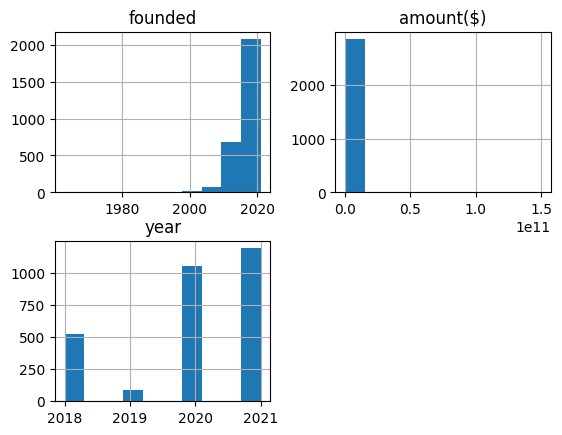

In [59]:
final_dataset.hist()

## <center>***Hypothesis Test***</center>


In [60]:
startups_in_bangalore = final_dataset[final_dataset['headquarter']=='Bangalore']
startups_not_in_bangalore = final_dataset[final_dataset['headquarter']!='Bangalore']

- *Mann-Whitney U test: amount($) values are not normally distributed*

In [61]:
# Perform Mann-Whitney U test
t, p = mannwhitneyu(startups_in_bangalore['amount($)'],startups_not_in_bangalore['amount($)'], alternative='two-sided')

# Print the test statistic and p-value
print("Mann-Whitney U test statistic:", t)
print("P-value:", p)

Mann-Whitney U test statistic: 979741.0
P-value: 6.519216663207475e-09


In [62]:
# Set Significance level
alpha = 0.05

#Compare p-value to the significance level
if p < alpha:
    print("We reject the null hypothesis. Which is there is no siginificate difference in the amount of funding between startups in Bangalore.")
else:
   print("We failed to reject the null hypothesis. There is a siginificate difference in the amount of funding between startups in Bangalore.")

We reject the null hypothesis. Which is there is no siginificate difference in the amount of funding between startups in Bangalore.


#### <center><h1 style="text-decoration: underline;">***BUSINESS QUESTIONS***</h1></center>


<span style="text-decoration: underline;">***1. What sectors have shown the highest growth in terms of funding received over the past four years?***</span>


In [63]:
year_sector_2018 = final_dataset[final_dataset['year']==2018]
year_sector_2019 = final_dataset[final_dataset['year']==2019]
year_sector_2020 = final_dataset[final_dataset['year']==2020]
year_sector_2021 = final_dataset[final_dataset['year']==2021]


#Group 2018 data by sector and get the sum of the amount
sector_year_funding_2018 = year_sector_2018.groupby('sector')['amount($)'].sum()/ 1e9
sector_year_funding_2018_reset = sector_year_funding_2018.reset_index().sort_values(by='amount($)', ascending=False).head(5)

#Group 2019 data by sector and get the sum of the amount
sector_year_funding_2019 = year_sector_2019.groupby('sector')['amount($)'].sum()/ 1e9
sector_year_funding_2019_reset = sector_year_funding_2019.reset_index().sort_values(by='amount($)', ascending=False).head(5)

#Group 2020 data by sector and get the sum of the amount
sector_year_funding_2020 = year_sector_2020.groupby('sector')['amount($)'].sum()/ 1e9
sector_year_funding_2020_reset = sector_year_funding_2020.reset_index().sort_values(by='amount($)', ascending=False).head(5)

#Group 2021 data by sector and get the sum of the amount
sector_year_funding_2021 = year_sector_2021.groupby('sector')['amount($)'].sum()/ 1e9
sector_year_funding_2021_reset = sector_year_funding_2021.reset_index().sort_values(by='amount($)', ascending=False).head(5)

sector_year_funding_2018_reset

,sector,amount($)
6,Finance,1.798271
7,Food & Beverages,1.225811
18,Transport,1.104162
4,Education,0.610361
5,Energy,0.588968


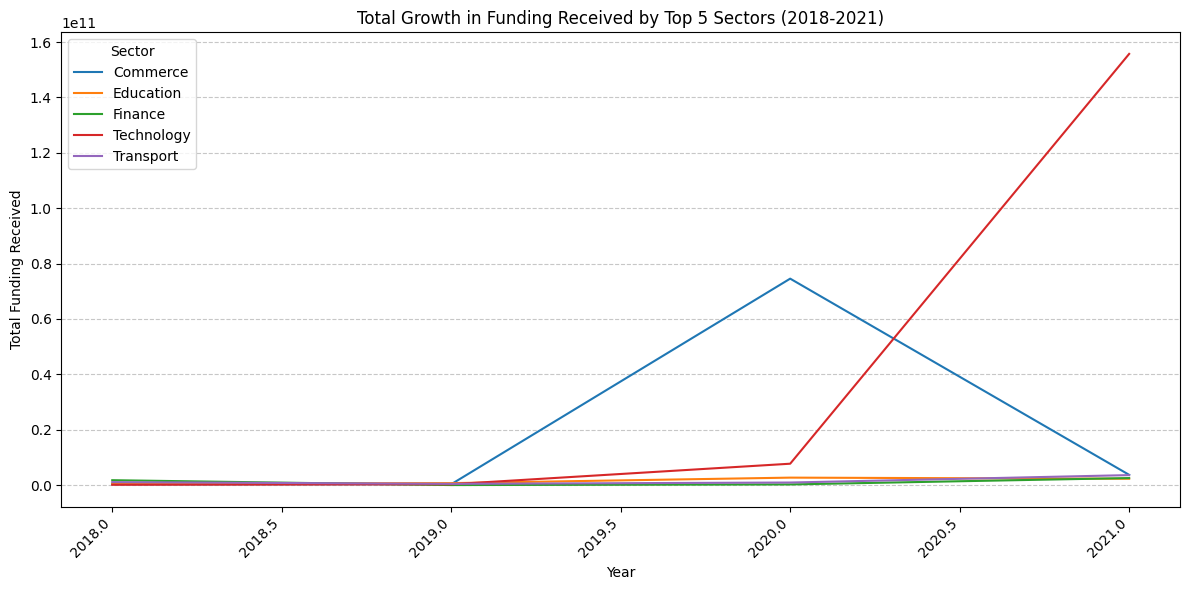

In [64]:
data = final_dataset.groupby(['sector', 'year'])['amount($)'].sum().reset_index()

# Calculate total funding received by each sector
total_funding = data.groupby('sector')['amount($)'].sum()

# Get top 5 sectors by total funding
top_5_sectors = total_funding.nlargest(5).index

# Filter the grouped data for only the top 5 sectors
top_5_growth = data[data['sector'].isin(top_5_sectors)]

# Pivot the table to have sectors as rows and years as columns
pivot_table = top_5_growth.pivot(index= 'year', columns= 'sector', values='amount($)')


# Plot the total funding received for each sector over the years (line plot)
pivot_table.plot(kind='line', figsize=(12, 6))
plt.title('Total Growth in Funding Received by Top 5 Sectors (2018-2021)')
plt.xlabel('Year')
plt.ylabel('Total Funding Received')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sector')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



<span style="text-decoration: underline;">***2. What locations within India have emerged as the primary hubs for startup activity and investment, and what factors contribute to their prominence?***</span>


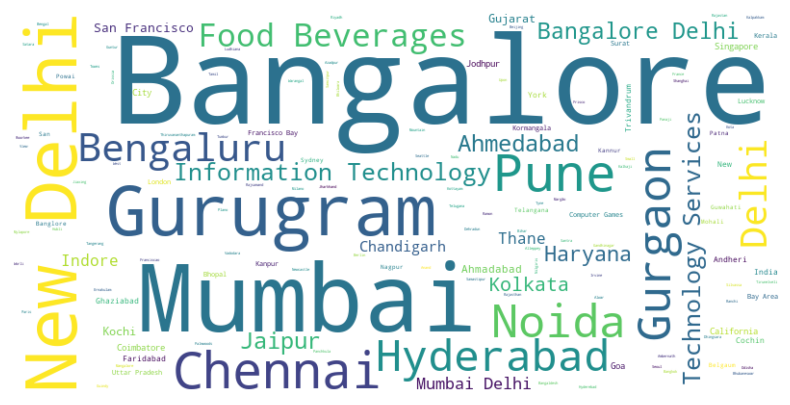

In [65]:
df = pd.DataFrame(final_dataset)

# Concatenate all sectors into a single string
text = ' '.join(df['headquarter'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

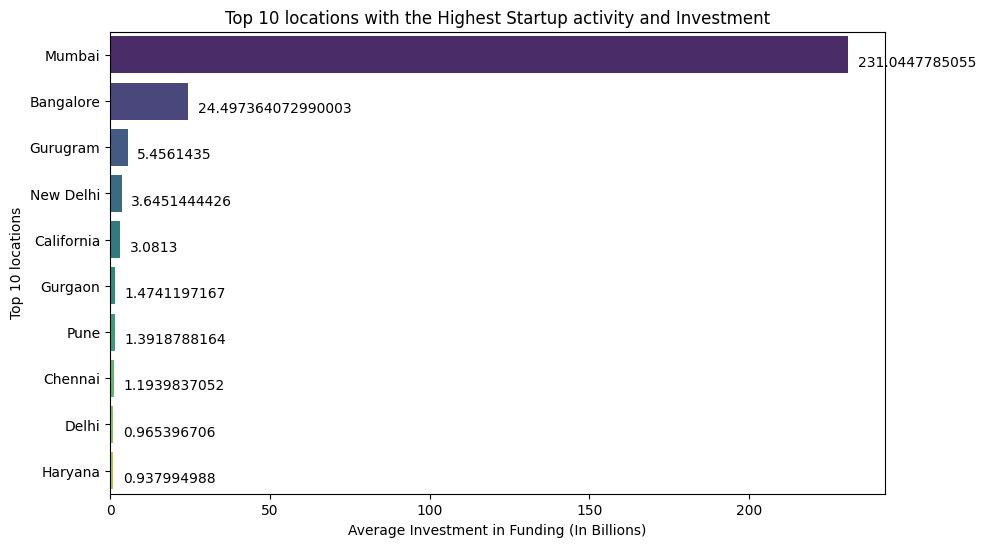

In [66]:


# Grouping the dataset based on the headquarters
startups_by_location = final_dataset.groupby('headquarter')['amount($)'].sum()

#Reset index and get the top 10 locations
top_10_locations = startups_by_location.reset_index().sort_values(by ='amount($)', ascending = False).head(10)

# top_10_locations

# #Convert the 'growth' values to billions
top_10_locations['growth_billions'] = top_10_locations['amount($)'] / 1e9

# Plotting using seaborn
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='growth_billions', y='headquarter', data=top_10_locations, palette="viridis")
# Add the numbers near the bars
for i, v in enumerate(top_10_locations['growth_billions']):
    bar_plot.text(v + 3, i + .25, str(v), color='black', fontweight='light')

plt.title('Top 10 locations with the Highest Startup activity and Investment')
plt.xlabel('Average Investment in Funding (In Billions)')
plt.ylabel('Top 10 locations')
plt.show()

In [67]:
top_10_locations

,headquarter,amount($),growth_billions
74,Mumbai,2.310448e+11,231.044779
9,Bangalore,2.449736e+10,24.497364
42,Gurugram,5.456144e+09,5.456143
77,New Delhi,3.645144e+09,3.645144
21,California,3.081300e+09,3.081300
41,Gurgaon,1.474120e+09,1.474120
90,Pune,1.391879e+09,1.391879
23,Chennai,1.193984e+09,1.193984
28,Delhi,9.653967e+08,0.965397
44,Haryana,9.379950e+08,0.937995


<span style="text-decoration: underline;">***3. Are there any notable differences in funding patterns between early-stage startups and more established companies?***</span>


In [68]:
#Getting the median year for the founded coulmn
overall_median_per_year  # The overall median year is 2016

final_dataset['stage_of_startup'] = np.where(final_dataset['founded'] >= overall_median_per_year, 'Early Stage', 'Established')


In [69]:
# Display the count of each category in the 'stage' column
stage_distribution = final_dataset['stage_of_startup'].value_counts()

# Print or visualize the distribution
print(stage_distribution)


stage_of_startup
Early Stage    2073
Established     783
Name: count, dtype: int64


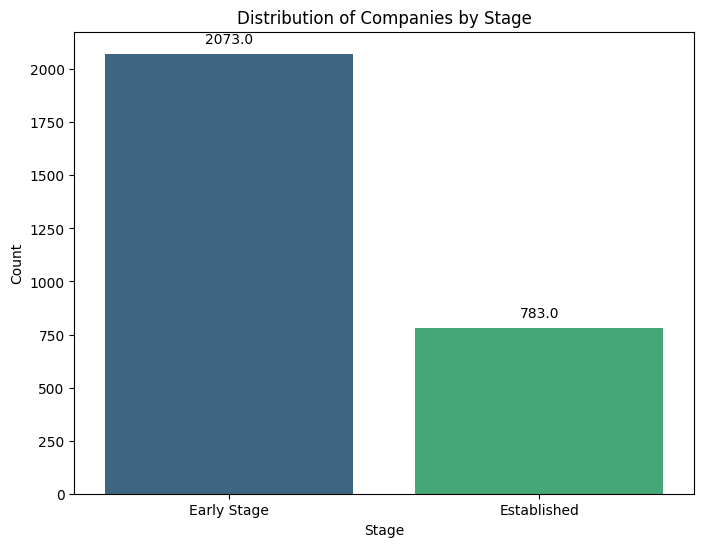

In [70]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot countplot for 'stage'
sns.countplot(x='stage_of_startup', data=final_dataset, ax=ax, palette="viridis")

# Display the count above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Companies by Stage')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

In [71]:
early_stage_stats = final_dataset[final_dataset['stage_of_startup'] == 'Early Stage']['amount($)'].describe()
established_stats = final_dataset[final_dataset['stage_of_startup'] == 'Established']['amount($)'].describe()

print("Early Stage Funding Statistics:")
print(early_stage_stats)

print("\nEstablished Funding Statistics:")
print(established_stats)


Early Stage Funding Statistics:
count    2.073000e+03
mean     8.402808e+07
std      3.294572e+09
min      8.789400e+02
25%      1.000000e+06
50%      3.000000e+06
75%      5.000000e+06
max      1.500000e+11
Name: amount($), dtype: float64

Established Funding Statistics:
count    7.830000e+02
mean     1.368202e+08
std      2.505485e+09
min      4.090000e+04
25%      3.000000e+06
50%      6.000000e+06
75%      3.000000e+07
max      7.000000e+10
Name: amount($), dtype: float64


**Mean Funding Amount:** Early-stage companies have a slightly lower mean funding amount ($83.88 million) compared to established companies ($136.97 million).

**Variability (Standard Deviation):** Both groups exhibit high variability in funding amounts, as indicated by the large standard deviations.

**Minimum and Maximum Funding:** Both groups have a wide range of funding amounts, with early-stage companies having a minimum of $720 and a maximum of $150 billion, while established companies range from $40,900 to $70 billion.

**Percentiles (Q1, Median, Q3):** Early-stage companies generally have lower funding amounts at each percentile compared to established companies.

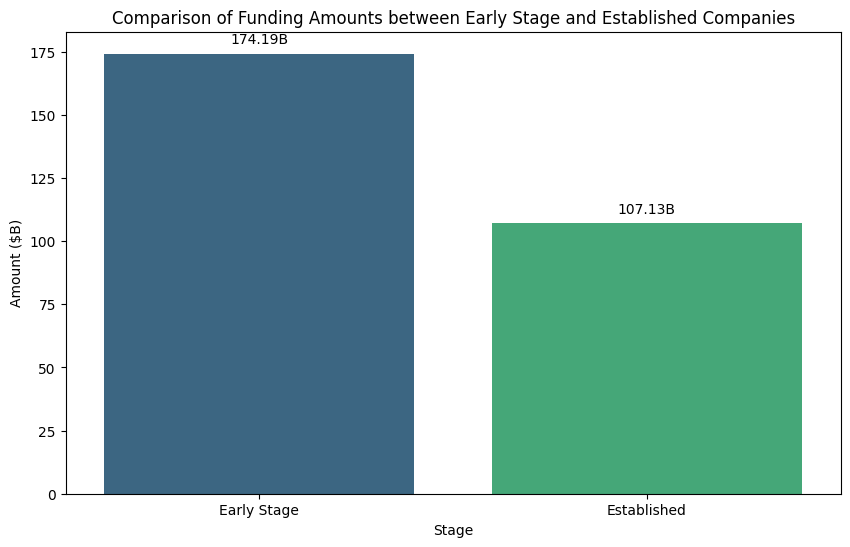

In [72]:
early_stage_startups = final_dataset.groupby('stage_of_startup')['amount($)'].sum().reset_index()
early_stage_startups['amount_in_billions'] = early_stage_startups['amount($)'] / 1e9

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='stage_of_startup', y='amount_in_billions', data=early_stage_startups, ci=None, palette="viridis")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}B', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Comparison of Funding Amounts between Early Stage and Established Companies')
plt.xlabel('Stage')
plt.ylabel('Amount ($B)')
plt.show()

 

#### Hypothesis Testing 

#### 
*Null Hypothesis(H0)*: There is no significant difference in the average funding amounts between early-stage startups and established companies.

*Alternative Hypothesis(H1)*: There is a significant difference in the average funding amounts between early-stage startups and established companies.

In [73]:
early_stage_funding = final_dataset[final_dataset['stage_of_startup'] == 'Early Stage']['amount($)']
established_funding = final_dataset[final_dataset['stage_of_startup'] == 'Established']['amount($)']

t_stat, p_value = ttest_ind(early_stage_funding, established_funding, nan_policy='omit')


# Set Significance level
alpha = 0.05
 
#Compare p-value to the significance level
if p_value < alpha:
    print('We reject the Null hypothesis.There is no significant difference in the average funding amounts between early_stage startups and established companies')
else:
   print("We fail to reject the Null hypothesis")


# print(f"T-statistic: {t_stat}")
# print(f"P-value: {p_value}")

We fail to reject the Null hypothesis


<span style="text-decoration: underline;">***4. Which sectors recieve the lowest level of funding and which sectors recieve the highest levels of funding in India***</span>


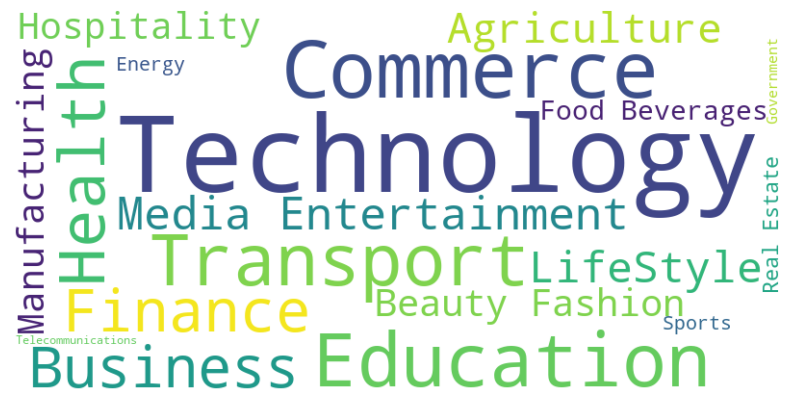

In [74]:
df = pd.DataFrame(final_dataset)

# Concatenate all sectors into a single string
text = ' '.join(df['sector'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

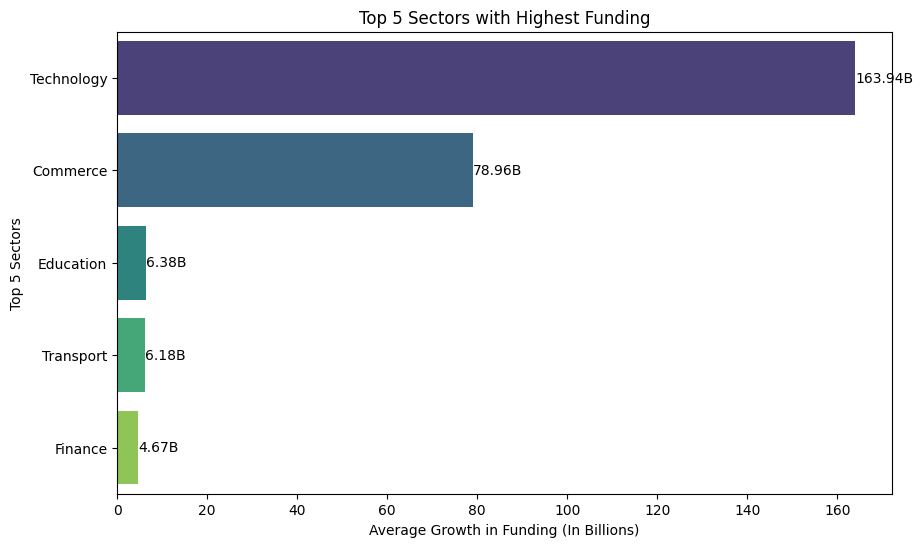

,sector,amount($),growth_billions
16,Technology,1.639387e+11,163.938688
3,Commerce,7.895793e+10,78.957930
4,Education,6.382230e+09,6.382230
18,Transport,6.175128e+09,6.175128
6,Finance,4.669878e+09,4.669878


In [75]:
# Group data by sector and get the sum of the amount
sector_year_funding = final_dataset.groupby('sector')['amount($)'].sum()
sector_year_funding_reset = sector_year_funding.reset_index().sort_values(by='amount($)', ascending=False).head(5)

# Convert the 'growth' values to billions
sector_year_funding_reset['growth_billions'] = sector_year_funding_reset['amount($)'] / 1e9

def annotate_bars(data, ax):
    for index, value in enumerate(data['growth_billions']):
        ax.text(value, index, f'{value:.2f}B', ha='left', va='center', fontsize=10)

# Plotting using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='growth_billions', y='sector', data=sector_year_funding_reset, palette="viridis")

plt.title('Top 5 Sectors with Highest Funding')
plt.xlabel('Average Growth in Funding (In Billions)')
plt.ylabel('Top 5 Sectors')

# Annotate the bars with values
annotate_bars(sector_year_funding_reset, ax)
plt.show()
sector_year_funding_reset

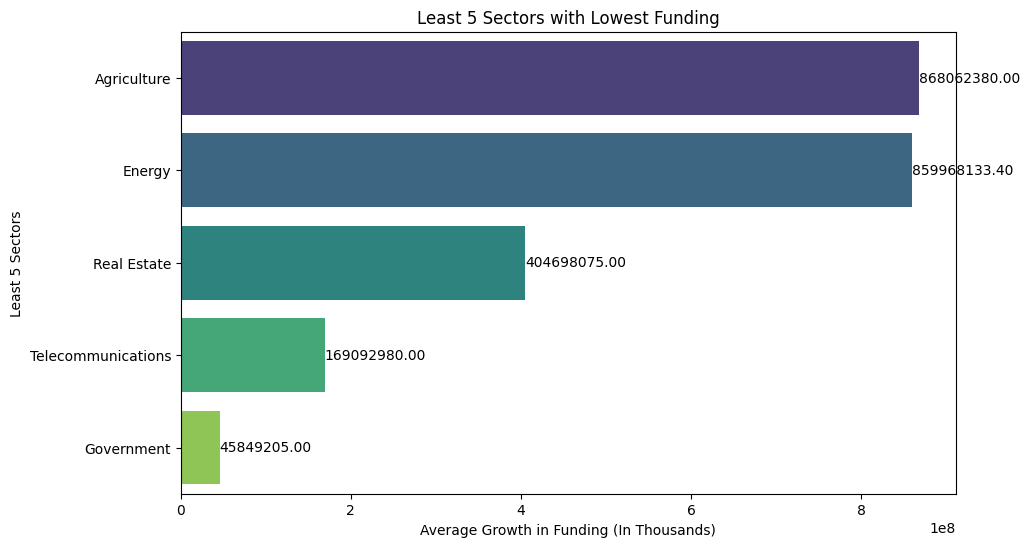

,sector,amount($)
0,Agriculture,868062380.0
5,Energy,859968133.4
14,Real Estate,404698075.0
17,Telecommunications,169092980.0
8,Government,45849205.0


In [76]:
#Group data by sector and get the sum of the amount
sector_year_funding = final_dataset.groupby('sector')['amount($)'].sum()
sector_year_funding_reset = sector_year_funding.reset_index().sort_values(by='amount($)', ascending=False).tail(5)

#Convert the 'growth' values to billions
# sector_year_funding_reset['growth_billions'] = sector_year_funding_reset['amount($)'] / 1e9

def annotate_bars(data, ax):
    for index, value in enumerate(data['amount($)']):
        ax.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10)

# Plotting using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='amount($)', y='sector', data=sector_year_funding_reset, palette="viridis")

annotate_bars(sector_year_funding_reset,ax)
plt.title('Least 5 Sectors with Lowest Funding')
plt.xlabel('Average Growth in Funding (In Thousands)')
plt.ylabel('Least 5 Sectors')
plt.show()
sector_year_funding_reset

<span style="text-decoration: underline;">***5. Which investors have more impact on startups over the years?***</span>


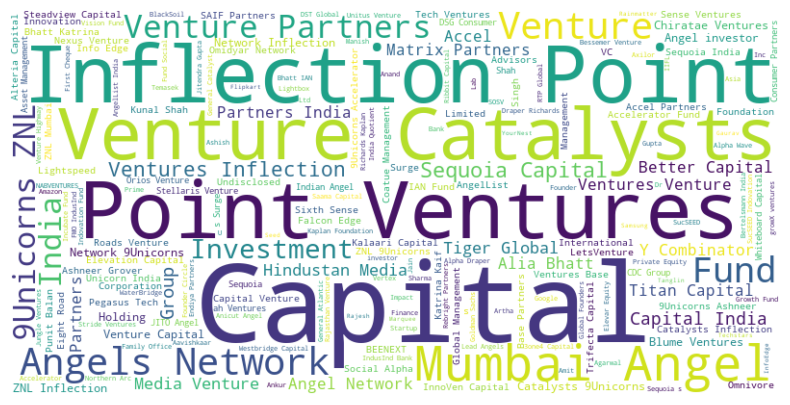

In [77]:
df = pd.DataFrame(final_dataset)

# Concatenate all sectors into a single string
text = ' '.join(df['investor'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [78]:
# Group by investor and sum the investment amounts
investor_impact = final_dataset.groupby('investor')['amount($)'].sum()

# Get the top 10 investors with the highest total investment amounts
top_10_investors = investor_impact.nlargest(10)

#Return top 10 investors
top_10_investors

# Reset index and rename the columns
top_10_investors_reset = top_10_investors.reset_index()
top_10_investors_reset.columns = ['Investor', 'amount']
top_10_investors_reset

,Investor,amount
0,Venture Catalysts,1.513115e+11
1,"Silver Lake, Mubadala Investment Company",7.000000e+10
2,"Salesforce Ventures, Dragoneer Investment Group",3.000000e+09
3,"Facebook, Google, KKR, Silver Lake",2.200000e+09
4,"9Unicorns, ZNL",1.801696e+09
5,Coatue Management,1.504311e+09
6,Inflection Point Ventures,1.487355e+09
7,Mumbai Angels Network,1.434835e+09
8,Tiger Global,1.417000e+09
9,"Canaan Valley Capital, Glade Brook Capital Par...",1.000000e+09


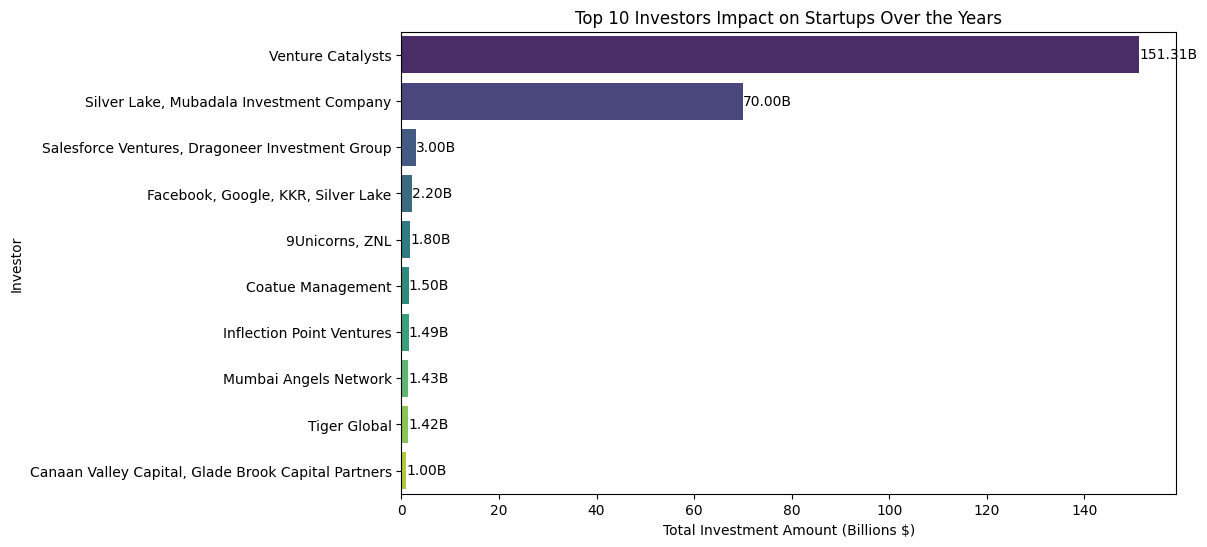

In [79]:
# Convert the 'amount' values to billions
top_10_investors_reset['amount_billions'] = top_10_investors_reset['amount'] / 1e9

# Sort the DataFrame by 'amount_billions' column in descending order
top_10_investors_reset = top_10_investors_reset.sort_values(by='amount_billions', ascending=False)

# Plotting using seaborn
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='amount_billions', y='Investor', data=top_10_investors_reset, palette="viridis")

# Add data labels
for index, row in top_10_investors_reset.iterrows():
    bar_plot.text(row['amount_billions'], index, f'{row["amount_billions"]:.2f}B', va='center')

plt.title('Top 10 Investors Impact on Startups Over the Years')
plt.xlabel('Total Investment Amount (Billions $)')
plt.ylabel('Investor')
plt.show()



In [80]:
# Assuming 'clean_data' is your clean dataset 
# final_dataset.to_csv(r'C:\Users\User\Desktop\LP1\clean_dataset.csv', index=False)


In [81]:


# Group by sector and year, summing the funding received
grouped_data = final_dataset.groupby(['sector', 'year'])['amount($)'].sum().reset_index()

growth_table = grouped_data.pivot(index='sector', columns='year', values='amount($)').fillna(0)


growth_table['Growth'] = ((growth_table[2021] - growth_table[2019]) / growth_table[2019]) * 100

# Step 4: Sort sectors based on percentage growth
sorted_sectors = growth_table.sort_values(by='Growth', ascending=False)

# Step 5: Print or visualize the results
print(sorted_sectors.head())  # Display sectors with highest growth



year                       2018         2019          2020          2021  \
sector                                                                     
Telecommunications     292980.0          0.0  1.078000e+08  6.100000e+07   
Energy              588968133.4          0.0  4.600000e+07  2.250000e+08   
Government            3759205.0          0.0  4.280000e+06  3.781000e+07   
Technology          142918541.3  328140000.0  7.748644e+09  1.557190e+11   
Business            419612115.9    5740500.0  1.798741e+08  1.440580e+09   

year                      Growth  
sector                            
Telecommunications           inf  
Energy                       inf  
Government                   inf  
Technology          4.735505e+04  
Business            2.499503e+04  


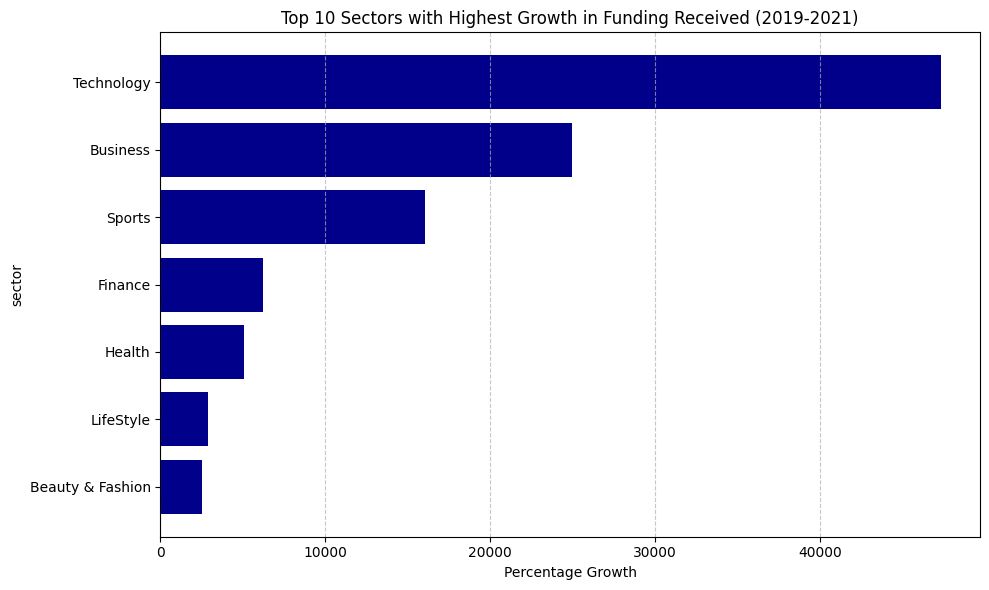

In [82]:

# Select the top N sectors to plot
top_n = 10  # You can adjust this number based on your preference
top_sectors = sorted_sectors.head(top_n)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_sectors.index, top_sectors['Growth'], color='darkblue')
plt.xlabel('Percentage Growth')
plt.ylabel('sector')
plt.title(f'Top {top_n} Sectors with Highest Growth in Funding Received (2019-2021)')
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


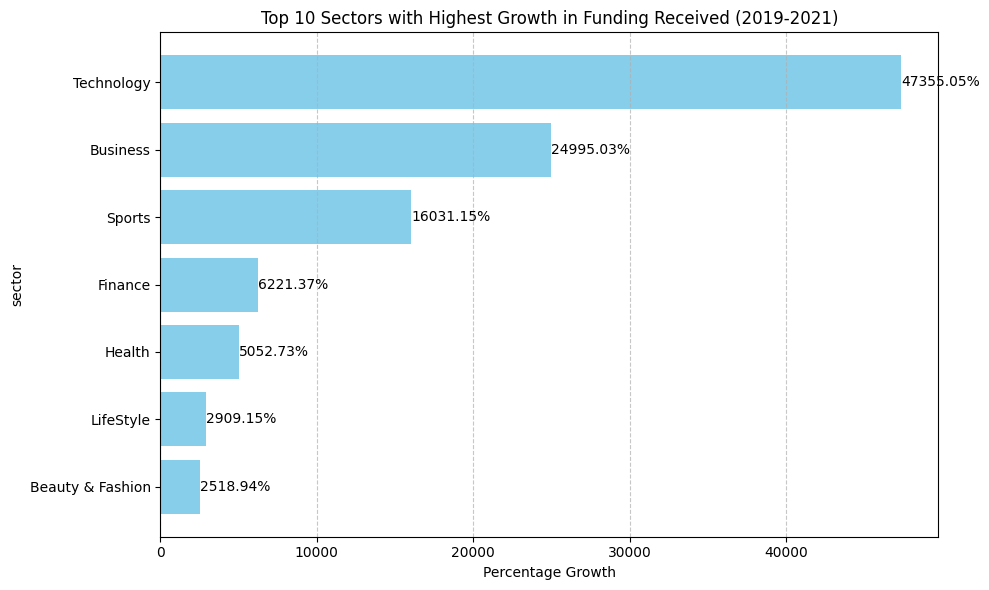

In [83]:

top_n = 10  
top_sectors = sorted_sectors.head(top_n)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(top_sectors.index, top_sectors['Growth'], color='skyblue')
plt.xlabel('Percentage Growth')
plt.ylabel('sector')
plt.title(f'Top {top_n} Sectors with Highest Growth in Funding Received (2019-2021)')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest growth at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add growth percentage labels inside the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', ha='left')

plt.tight_layout()
plt.show()


###Save datasets as flat files

In [84]:
# Dataset from Microsoft SQL database
#first_dataset.to_csv('DataSet//startup_funding2020-2021.csv')

In [85]:
# #Final merged dataset with cleaned column names and cleaned amount values
# final_dataset.to_csv('DataSet/startup_funding2018-2021edited.csv')